In [1]:
import sys
sys.path.append('../coding')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from analysis.information import CIDOChannel, AdaptationChannel
%matplotlib inline

publication_directory = '../manuscript'

In [10]:
res_df = pd.read_pickle('../data/transition_rates.pkl')

In [3]:
def intensity_freq_func(intensity, B):
    exc = 2.67 * intensity
    inh = 3.73 * (1 + B * (intensity - 1))
    return exc, inh

In [4]:
ratios = []

for intensity in np.logspace(0, 1.6, 50):
    exc, inh = intensity_freq_func(intensity, B=0)
    ratios.append(inh * 10 / (exc * 3))

In [5]:
def arrowed_spines(fig, ax):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    # removing the axis ticks
#     plt.xticks([]) # labels 
#     plt.yticks([])
    ax.xaxis.set_ticks_position('none') # tick markers
    ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./20.*(ymax-ymin) 
    hl = 1./20.*(xmax-xmin)
    lw = 2. # axis line width
    ohg = 0.3 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, ymin, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(xmin, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, overhang = ohg, 
             length_includes_head= True, clip_on = False)

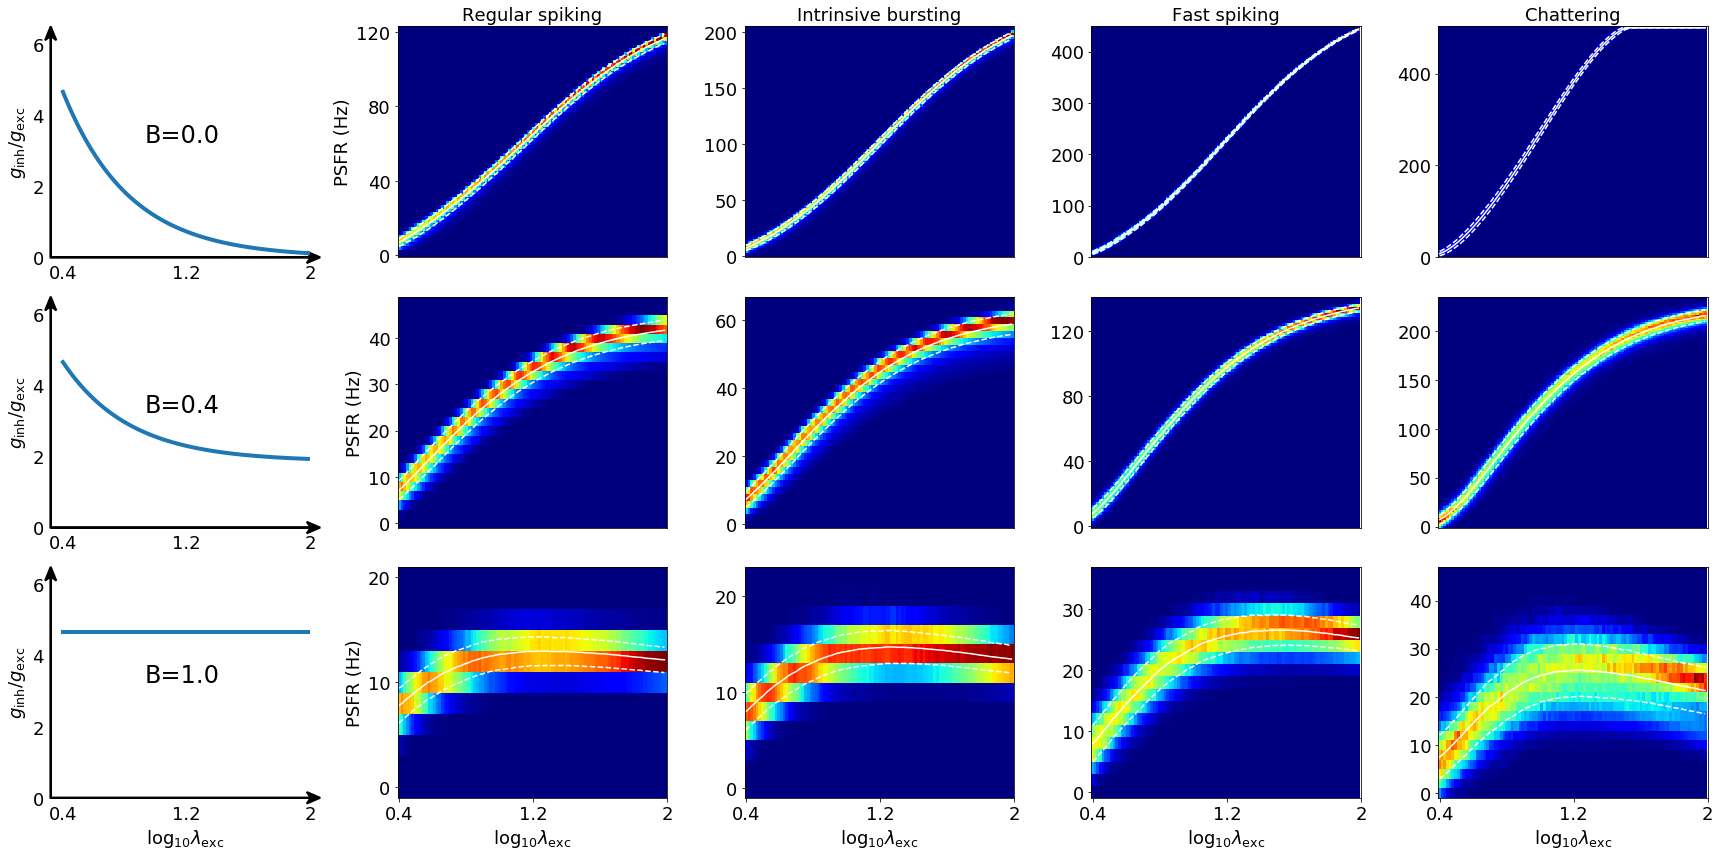

In [23]:
inh_ratios = [0, 0.4, 1]
neurons = ['RS','IB','FS','CH']

fig, axes = plt.subplots(nrows=len(inh_ratios), ncols=len(neurons) + 1, figsize=(24,12))

neuron_names = {
    'RS': 'Regular spiking',
    'IB': 'Intrinsive bursting',
    'FS': 'Fast spiking',
    'CH': 'Chattering'
}

for i, neuron in enumerate(neurons):
    for j, inh_ratio in enumerate(inh_ratios):
        ax = axes[j,i + 1]
        
        if j == 0:
            ax.set_title(neuron_names[neuron])
        
        channel = AdaptationChannel(res_df.loc[inh_ratio, 500, neuron])
        channel.plot(ax=ax, cmap='jet')
        
        yticks = ax.get_yticks()
        new_ticks = [y for y in yticks if y%5 == 0 and y >= 0 and y <= ax.get_ylim()[1]]
#         print(new_ticks)
#         if len(new_ticks) > 4:
#             new_ticks = [y for y in yticks if y%50 == 0 and y >= 0 and y <= ax.get_ylim()[1]]
        
        ax.set_yticks(new_ticks)
        
        fig.canvas.draw()
        
        ylabels = ax.get_yticklabels()
        
        new_labels = ['{:.0f}'.format(float(y.get_text()) * 2) for y in ylabels]
        ax.set_yticklabels(new_labels)
        
        ax.set_xticks([0, 50, 100])
        ax.set_xticklabels([0.4, 1.2, 2])
        
        if j != 2:
            ax.set_xticks([])
        
        if j == 2:
            ax.set_xlabel(r'$\log_{10}\lambda_\mathrm{exc}$')
        
        if i == 0:
            ax.set_ylabel('PSFR (Hz)')
            
            ratios = []
            
            x = np.logspace(0, 1.6, 100)
            
            for intensity in x:
                exc, inh = intensity_freq_func(intensity, B=inh_ratio)
                ratios.append(inh * 10 / (exc * 3))
            
            ax = axes[j,0]
            
            ax.plot(ratios, lw=4)
            ax.set_ylim(0, 6.5)
            ax.set_ylabel(r'$g_\mathrm{inh}/g_\mathrm{exc}$')
        
            ax.set_xticks([0, 50, 100])
#             ax.set_xticklabels([0, 0.8, 1.6])
            ax.set_xticklabels([0.4, 1.2, 2])
            
            if j == 2:
                ax.set_xlabel(r'$\log_{10}\lambda_\mathrm{exc}$')
            
            ax.text(x=0.35, y=0.5, s=f'B={inh_ratio:.1f}', transform=ax.transAxes, fontsize=24)
            
            arrowed_spines(fig, ax)

fig.tight_layout()
plt.savefig(f'{publication_directory}/img/tuning_curves.pdf', bbox_inches='tight')